# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [92]:
#Import libraries for data organization and manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries for splitting data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data and making predictions
from sklearn.preprocessing import StandardScaler #StandardScalar
from sklearn import tree
import statsmodels.stats.api as sms
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier



# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# For tuning the model / proper version of KFolds clustering
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Data Overview



In [93]:
from google.colab import drive ##mounting google drive to access data files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [94]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ExtraaLearn.csv') ##customer lead information into dataframe
df = data.copy()

In [95]:
df.shape  #15 variables and 4612 leads

(4612, 15)

In [96]:
df[df.isnull()].sum() ## no missing values

,0
ID,0
age,0.0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0.0
time_spent_on_website,0.0
page_views_per_visit,0.0
last_activity,0
print_media_type1,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing



In [97]:
df.shape ##15 columns lets try to drop some to make our life easier.

(4612, 15)

In [98]:
df.info() ##datatypes for all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [99]:
df.drop(["ID"], axis = 1, inplace = True) #dropping ID since it holds no value in converting leads to customers
df.head(5) #displaying first 5 lines of the dataframe

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [100]:
df[df.duplicated()] ##check for duplicates / there are none

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1097,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
1375,58,Professional,Website,High,0,0,0.0,Phone Activity,No,No,No,No,No,1
1592,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
1675,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
1679,32,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
2789,59,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
2980,58,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
3013,58,Unemployed,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,0
3227,59,Unemployed,Website,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
3278,57,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0


In [101]:
df.describe().T #statistical summary of numerical variables for all leads

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [102]:
x = (df['age'].min(),df['age'].max()) #checking the age range of the leads
print('Min and Max age of leads is', x)

Min and Max age of leads is (18, 63)


In [103]:
df0 = df[df['status'] ==0] #creating a separate dataframe for non-converted leads and their attributes
df0.head(10)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
7,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
9,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0
12,35,Professional,Website,High,4,239,2.214,Phone Activity,No,No,No,No,No,0
13,23,Student,Website,High,3,115,2.690,Email Activity,No,No,No,No,No,0
14,56,Professional,Website,High,6,358,0.279,Email Activity,No,No,No,No,No,0
15,62,Unemployed,Mobile App,High,5,1057,5.605,Phone Activity,No,No,No,Yes,No,0


In [104]:
df0[df0['website_visits'] ==0].shape #142 leads have not even visited the website.

(142, 14)

In [105]:
df1 = df[df['status'] ==1]  ##1377 out of 4612 were converted from leads to customers which is ~30%
df1.head(10)                         ##creating a separate dataframe for all converted leads and their attributes

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
6,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
8,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
10,52,Professional,Website,Medium,2,433,2.140,Email Activity,No,No,No,No,No,1
11,57,Professional,Website,High,3,616,3.485,Website Activity,Yes,Yes,No,No,No,1
16,47,Professional,Website,High,3,1419,3.450,Email Activity,No,No,Yes,No,Yes,1
24,49,Professional,Mobile App,High,5,2293,3.233,Email Activity,No,No,No,No,No,1
25,46,Professional,Website,Medium,4,1842,2.110,Email Activity,No,No,No,Yes,No,1
31,55,Unemployed,Website,Medium,13,1055,1.373,Email Activity,No,No,Yes,Yes,No,1


In [106]:
df0.describe().T #statistical summary of all non-converted leads

,count,mean,std,min,25%,50%,75%,max
age,3235.0,45.153014,13.748843,18.0,33.0000,49.000,57.0000,63.000
website_visits,3235.0,3.578980,2.874222,0.0,2.0000,3.000,5.0000,30.000
time_spent_on_website,3235.0,577.420711,676.340484,0.0,88.0000,317.000,646.0000,2531.000
page_views_per_visit,3235.0,3.025732,1.997962,0.0,2.0745,2.706,3.7735,18.434
status,3235.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.000


In [107]:
df1.describe().T #statistical summary of all converted leads

,count,mean,std,min,25%,50%,75%,max
age,1377.0,48.663762,11.293692,18.0,41.000,54.000,58.00,63.000
website_visits,1377.0,3.538126,2.721075,0.0,2.000,3.000,5.00,25.000
time_spent_on_website,1377.0,1068.397967,780.856643,0.0,390.000,789.000,1829.00,2537.000
page_views_per_visit,1377.0,3.027050,1.896893,0.0,2.083,2.935,3.73,13.656
status,1377.0,1.000000,0.000000,1.0,1.000,1.000,1.00,1.000


**OBSERVATIONS**



*   Generally speaking, the converted leads are older and spend twice as much time on the website.
*   Page views and web visits are very similar between leads and customers.
*   There are converted leads that show up in this data with 0 web visits, page views and time spent which depicts potential outliers.






## EDA


In [108]:
df1['referral'].value_counts() #only 63 converted leads heard about ExtraaLearn through a reference. Feels like we could improve on that number in the future.

,count
referral,
No,1314
Yes,63


In [109]:
df1.groupby(['first_interaction'])['current_occupation'].value_counts() ##for all converted leads, most of them are employed and most of their first interactions are with the website

first_interaction  current_occupation
Mobile App         Professional          115
                   Unemployed             86
                   Student                17
Website            Professional          814
                   Unemployed            297
                   Student                48
Name: count, dtype: int64

**UNIVARIATE ANALYSIS**





In [110]:
def histboxfunc(df, param): #function to plot both histogram and boxplot on same x axis for each numerical variable

  figure, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':(3,7)}, figsize=(15,7))
  sns.boxplot(data=df, x = param, showmeans=True, ax=ax[0], color='yellow')
  sns.histplot(data=df, x = param, kde = True, line_kws= {'linestyle': 'dashed'}, fill=False, ax=ax[1], color='green')
  ax[1].axvline(df[param].mean(),color='Red')
  ax[1].axvline(df[param].median(),linestyle='--', color='blue')

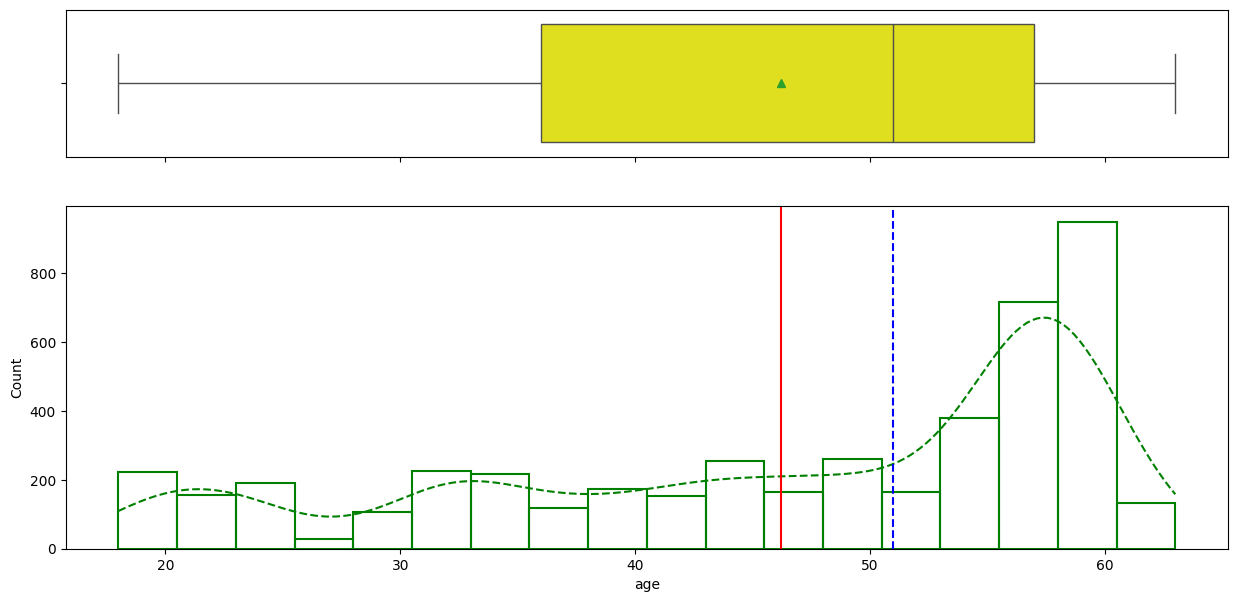

In [111]:
histboxfunc(df, 'age')

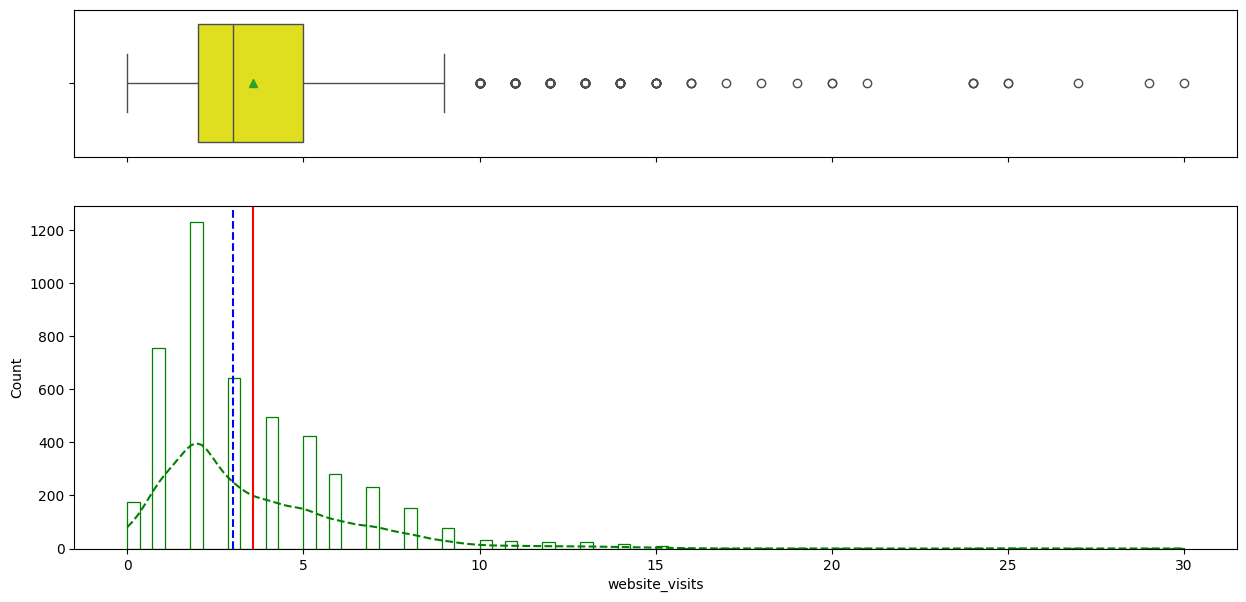

In [112]:
histboxfunc(df, 'website_visits')

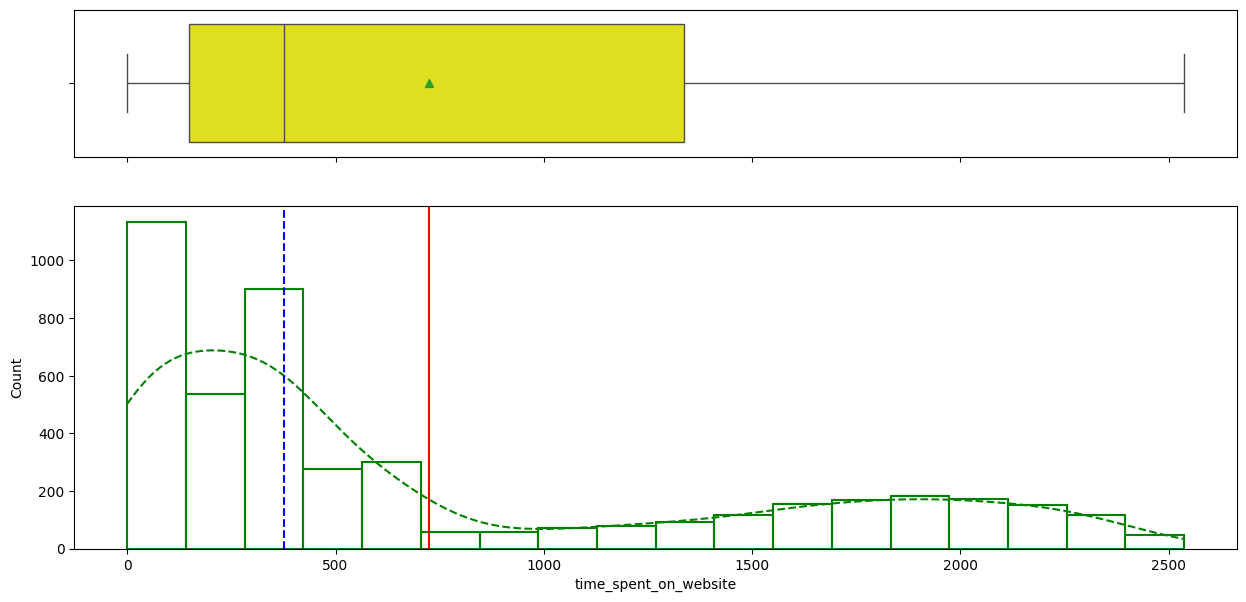

In [113]:
histboxfunc(df, 'time_spent_on_website')

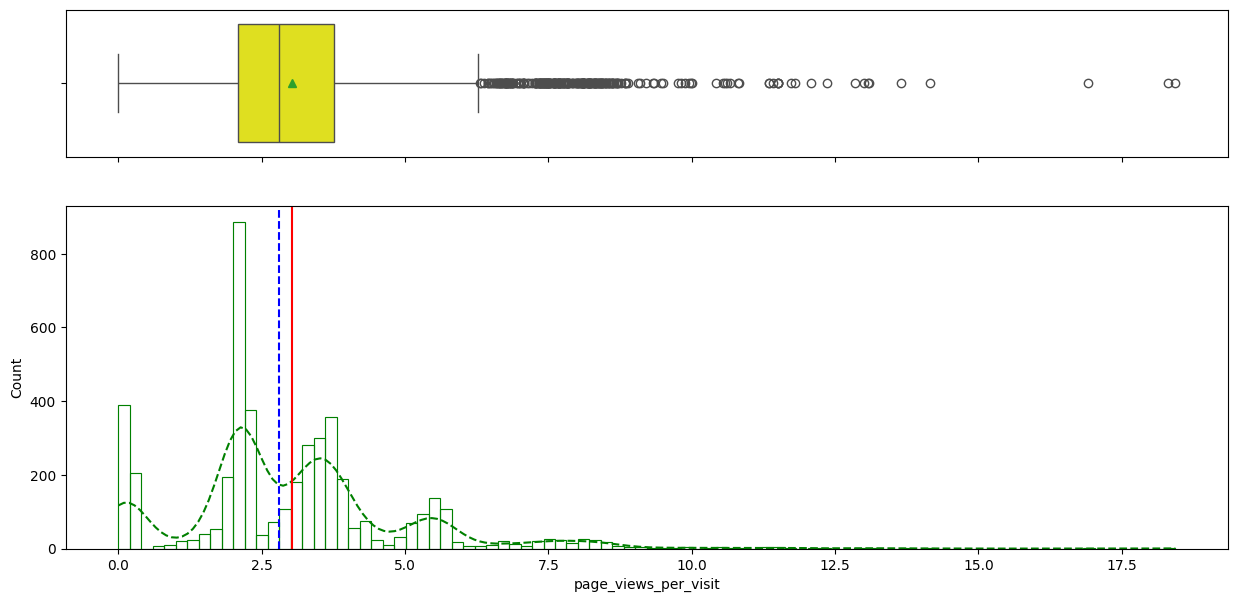

In [114]:
histboxfunc(df,'page_views_per_visit')

**OBSERVATIONS**


*   Distribution of "Age" is left skewed with the average age less then the median. Median age is 51 and Mean age is 46.
*   Distribution of "web visits", "time spent on web", and "page views per visit" aer all right skewed with some outliers.
*   One could argue that the page views distribution is normal with mean and median page views practically the same.   




**BIVARIATE ANALYSIS**


<Axes: >

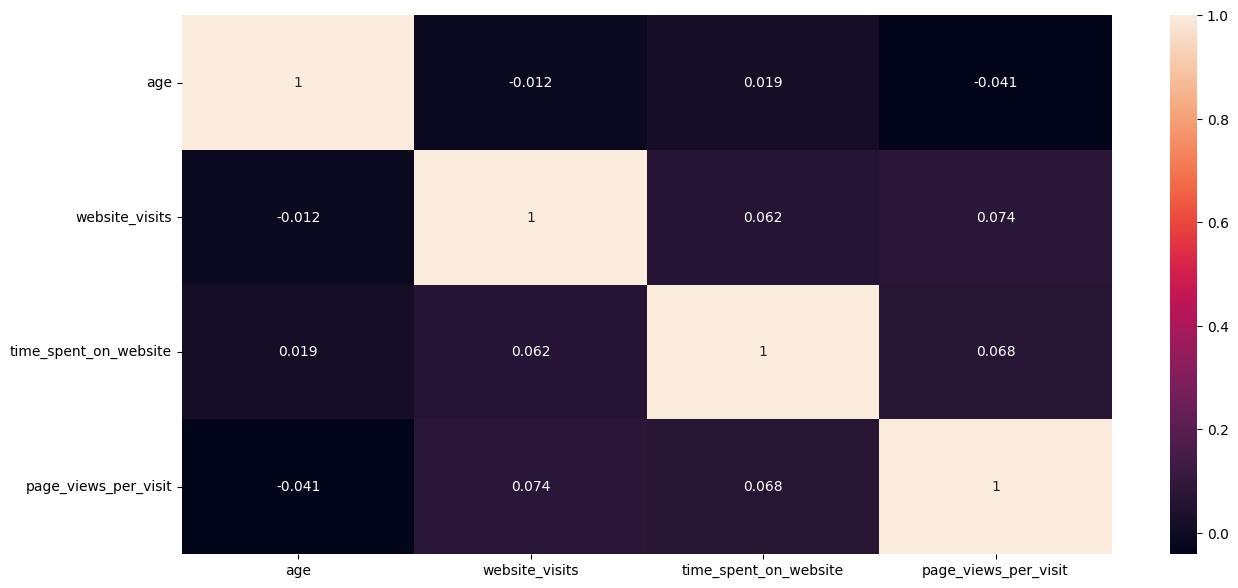

In [115]:
# Correlation matrix of the modified dataframe will provide the correlation between each variable in the dataset.
# Correlation matrix can be displayed as a heat map displaying in a grid format.
numcol = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit'] #list of numerical columns without status
plt.figure(figsize=(15,7))
sns.heatmap(df[numcol].corr(), annot = True)

<Axes: >

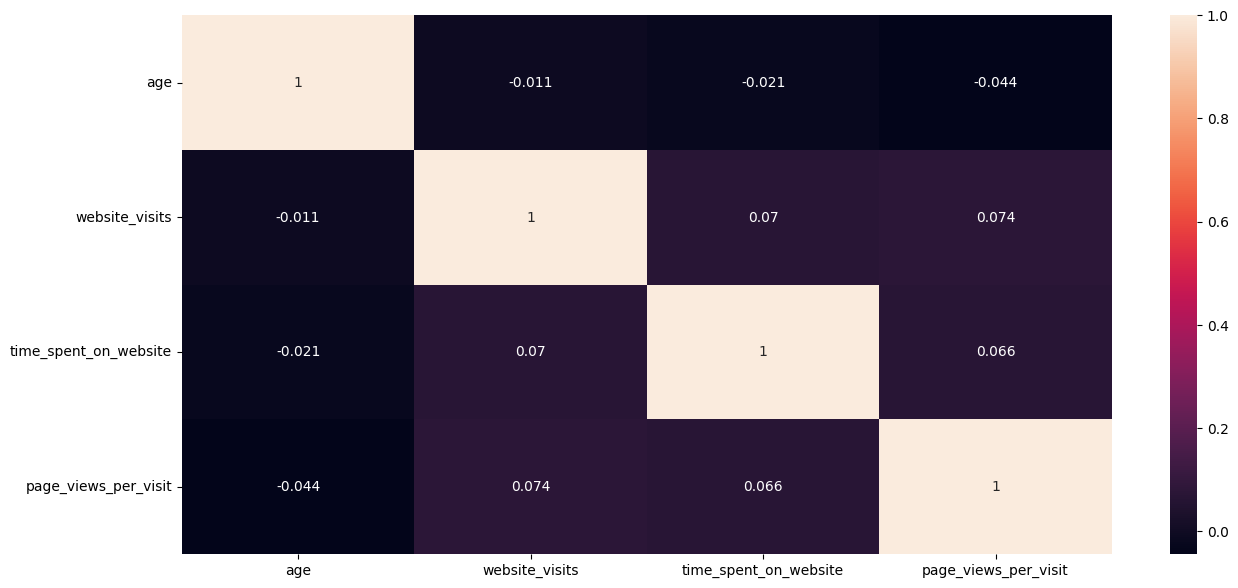

In [116]:
plt.figure(figsize=(15,7))
sns.heatmap(df0[numcol].corr(), annot = True)

<Axes: >

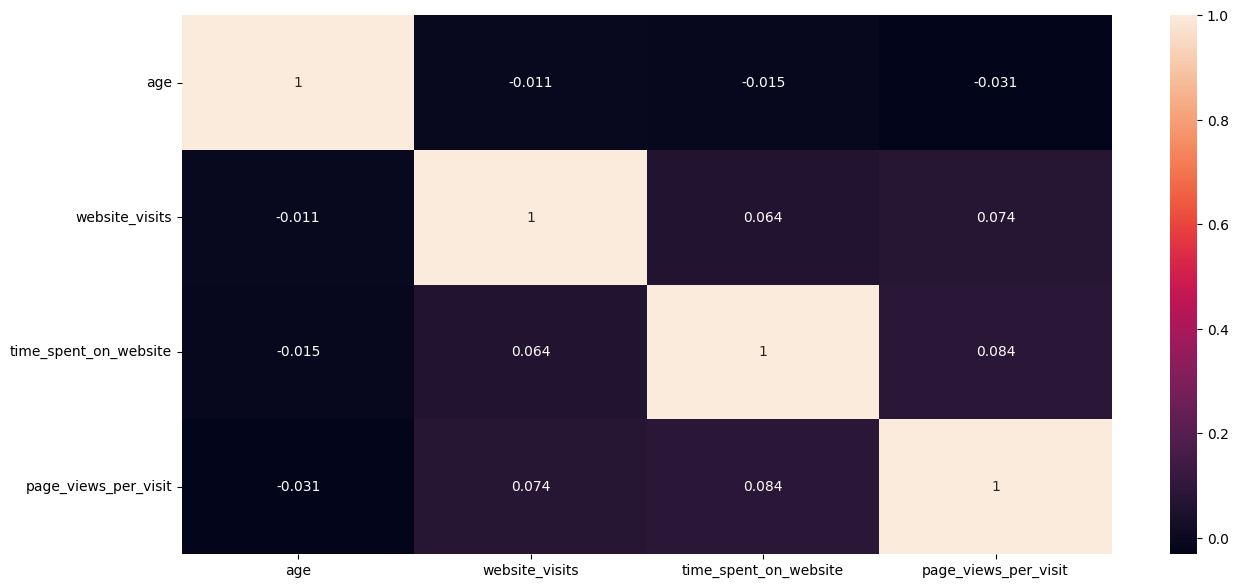

In [117]:
plt.figure(figsize=(15,7))
sns.heatmap(df1[numcol].corr(), annot = True)

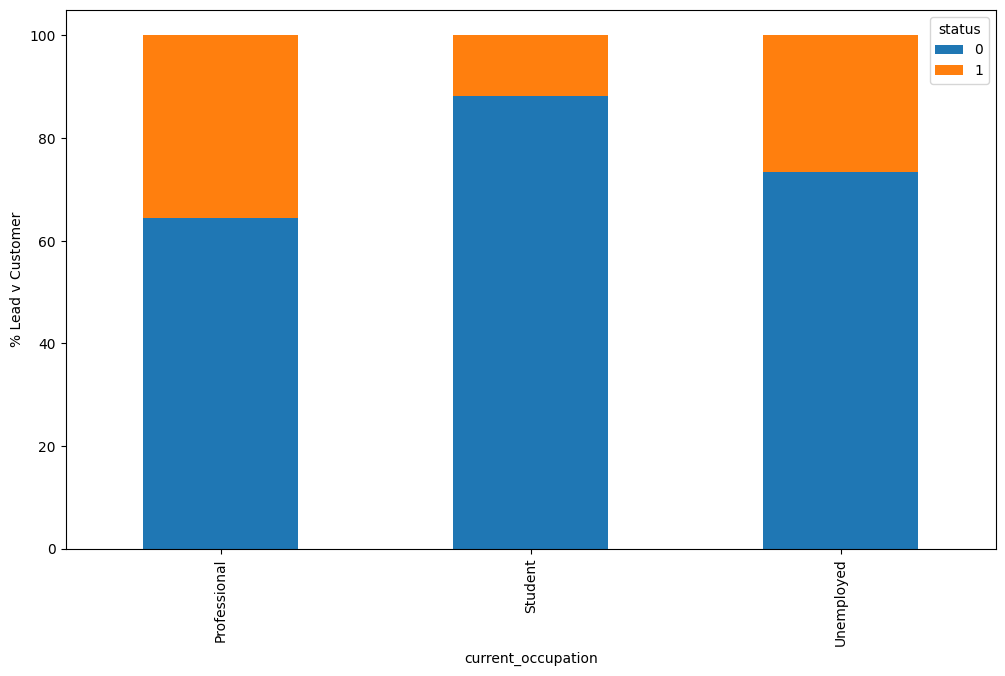

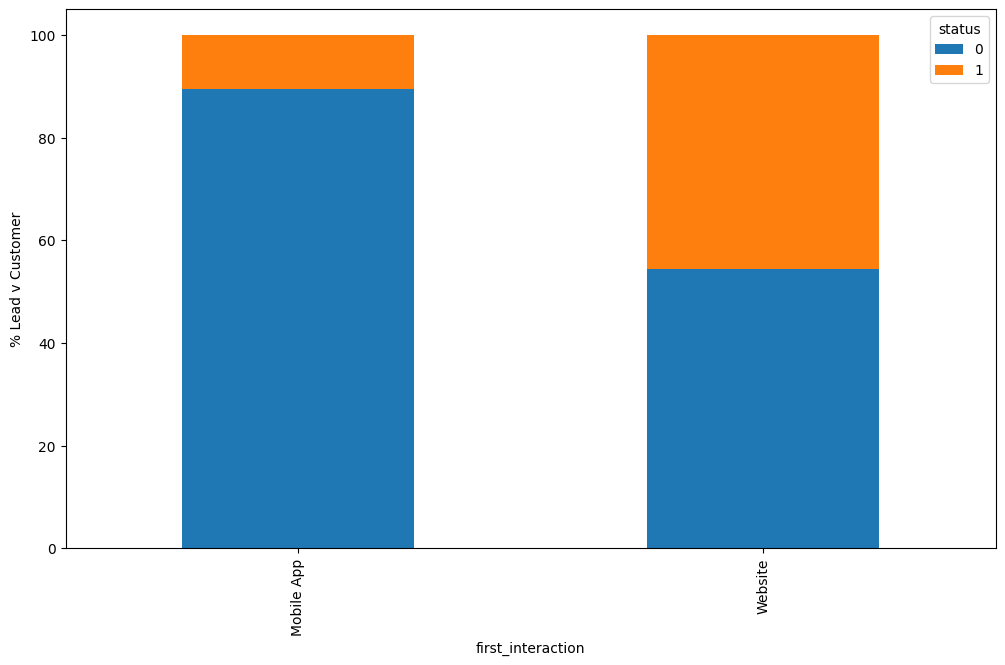

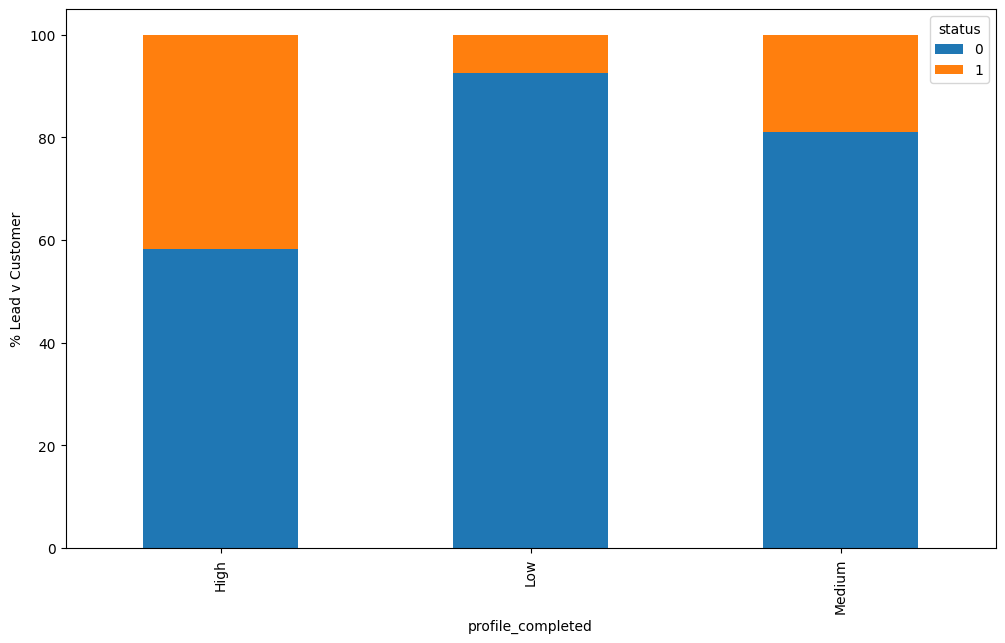

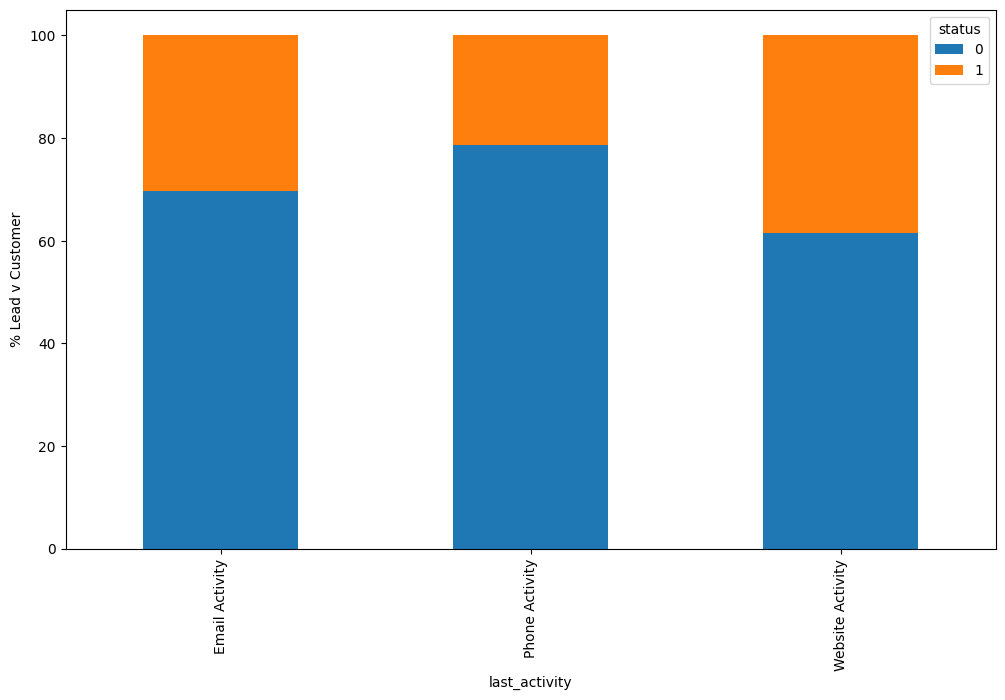

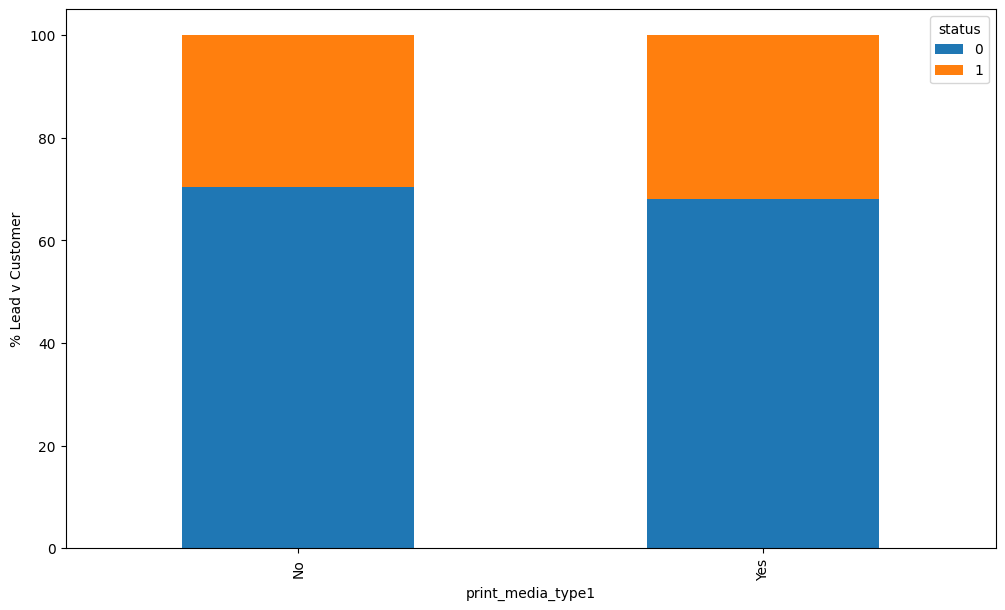

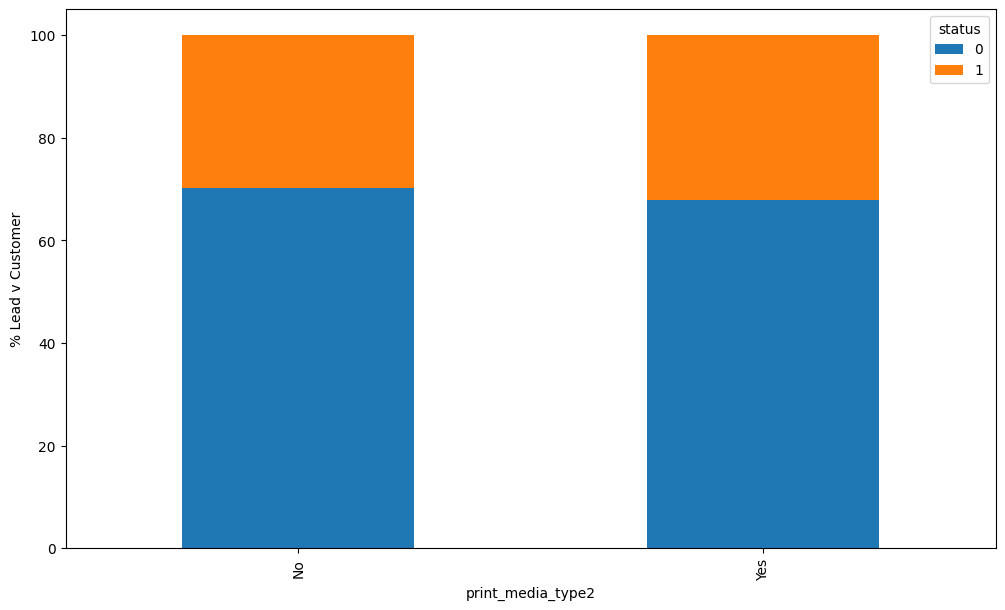

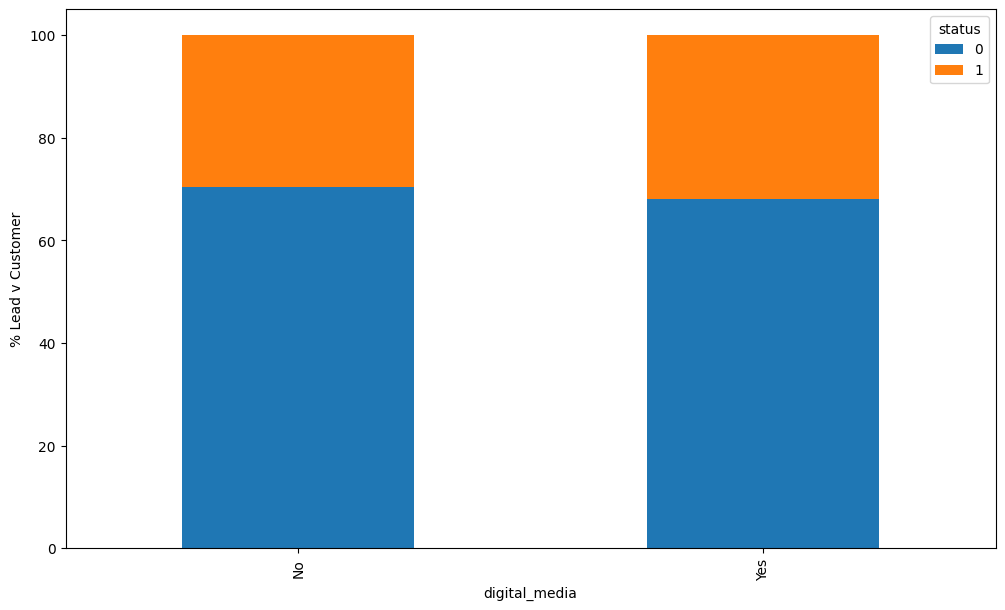

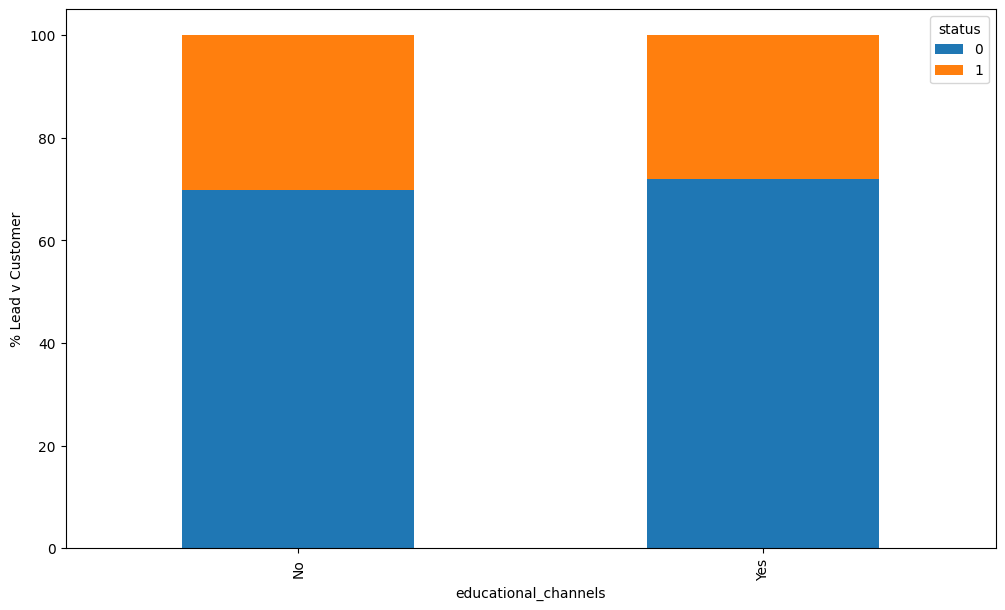

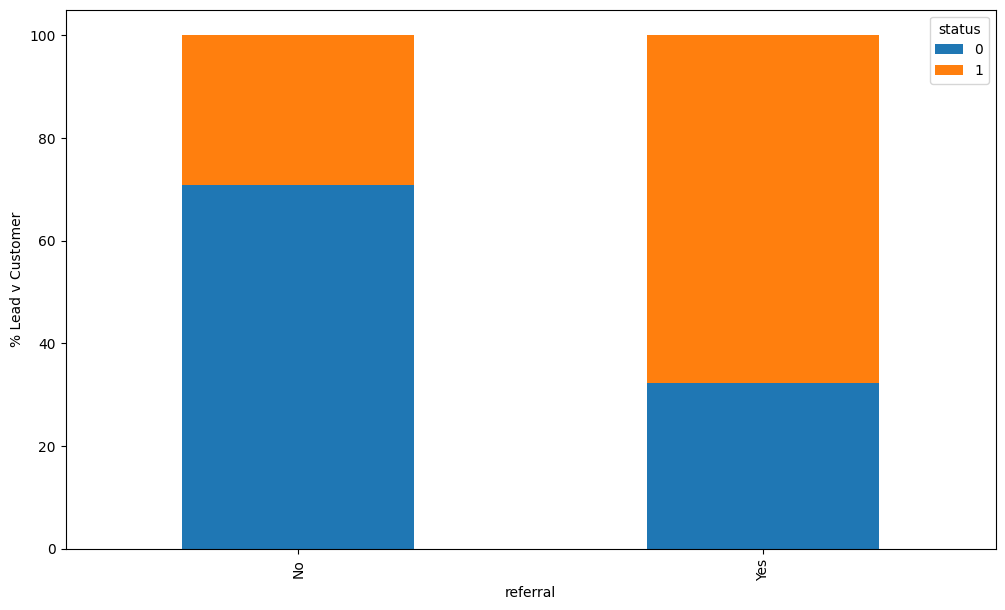

In [118]:
x = df.drop(['status'], axis = 1) #using dataframe without status and ID so we can easily compare categorical variables to the lead status for bivariate/multivariate analysis.
catcol = x.select_dtypes(include=['object']).columns.tolist() #creating a list of all categorical columns
for i in catcol:
      (pd.crosstab(x[i],df.status, normalize = 'index')*100).plot(kind='bar',figsize=(12,7),stacked=True) #plot the percentage of customer status vs all categorical variables.
      plt.ylabel('% Lead v Customer')
      plt.title('',loc='center')



**OBSERVATIONS**



*   Majority of current customers were referred
*   Printed media of any kind does not reflect on lead v non lead
*   Majority of current customers are working proffessionals
*   Website is the main source of customer and lead traffic




**OUTLIERS**


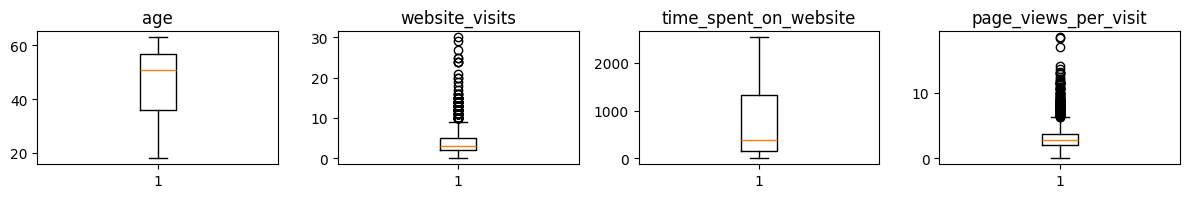

In [119]:
plt.figure(figsize=(12,7))
for i, variable in enumerate(numcol):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

OBSERVATIONS:


*   One could argue that there are outliers for website visiets and page views per visit. I am not going to treat them as they are directly correlated (more website visit visit, more page views) therefore we can still make predicitions with this data.



**MODEL PREPARATION**



In [120]:
x = df.drop(['status'], axis = 1) #building our machine learning model by splitting up the data to train the model and then test to see how well it was able to differentiate between leads and customers.
y = df['status']

x = pd.get_dummies(x, columns=catcol, drop_first=True, dtype=int) #built in pandas encoder that gives numerical values to categorical variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) #30% of data will be used to test the model while 70% will be used to train - sklearn does this for us.
x_train.shape, x_test.shape #verifying the split

((3228, 16), (1384, 16))

## Building a Decision Tree model


*   In order to make an efficient model, we need to understand the ways it make mistakes. Money spent on leads that will never become paying customers is inefficinet.
*   Therefore, we want maximize recall in order to limit the amount of false negatives, or incorrectly predicted customers, that the model is predicting.



In [121]:
#function that will provide scores/feedback on how well the model performed at predicting leads that will be customers
#feedback will be in the form of a confusion matrix that displays the probabilities of each outcome (True Positive, True Negative, False Positive, False Negative) over a heatmap.
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(12,7))

    sns.heatmap(cm, annot=True, xticklabels=['Lead', 'Customer'], yticklabels=['Lead', 'Customer'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [122]:
dtree = DecisionTreeClassifier(random_state = 1) #Build Model
dtree.fit(x_train,y_train)                       #Fit Model

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



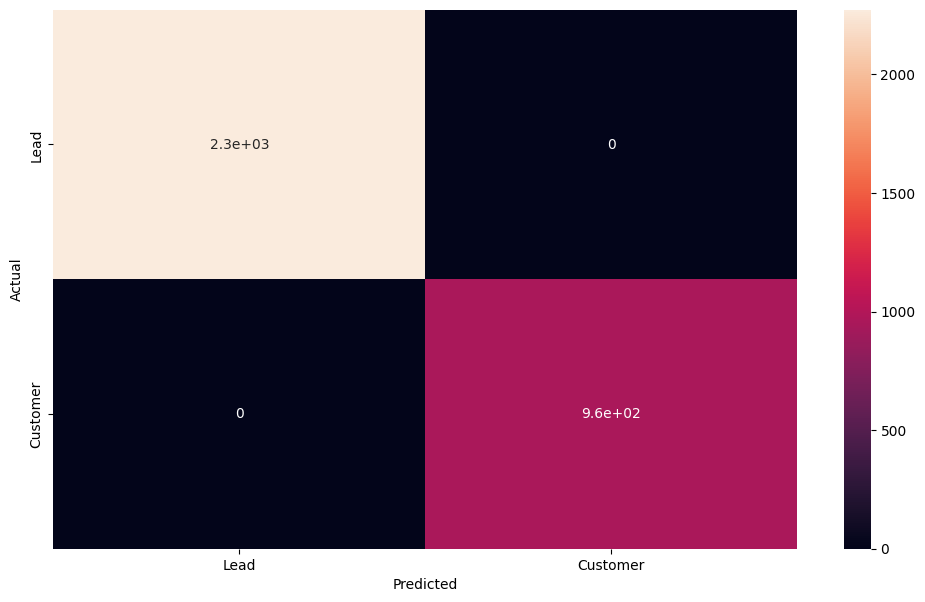

In [123]:
y_trainpred = dtree.predict(x_train)    #Prediction of Decision Tree model with training data

metrics_score(y_train, y_trainpred)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



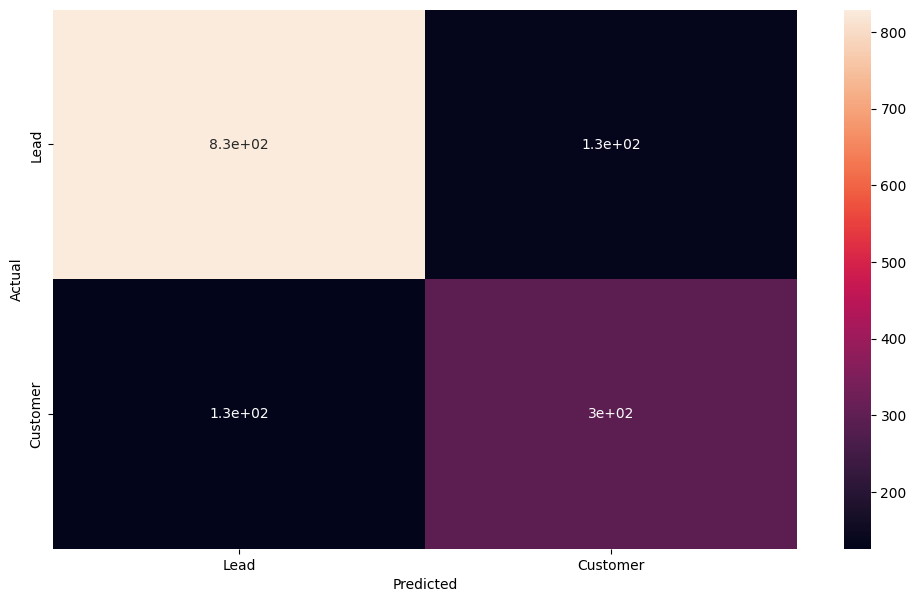

In [124]:
y_testpred = dtree.predict(x_test)    #Perfomance of Decision Tree model with test data

metrics_score(y_test, y_testpred)

## Do we need to prune the tree?


*   Training model claims to predict leads vs customers at 100% rate which means that model cannot be trusted.
*   Testing model is able to predict customers who are actually customers at around 70% which is more feasible.
*   We will need to prune the tree to create a more robust model that predicts(splits) the data more effectively.



In [125]:
# Choose the type of classifier
dtree_tune = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tune, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tune = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tune.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



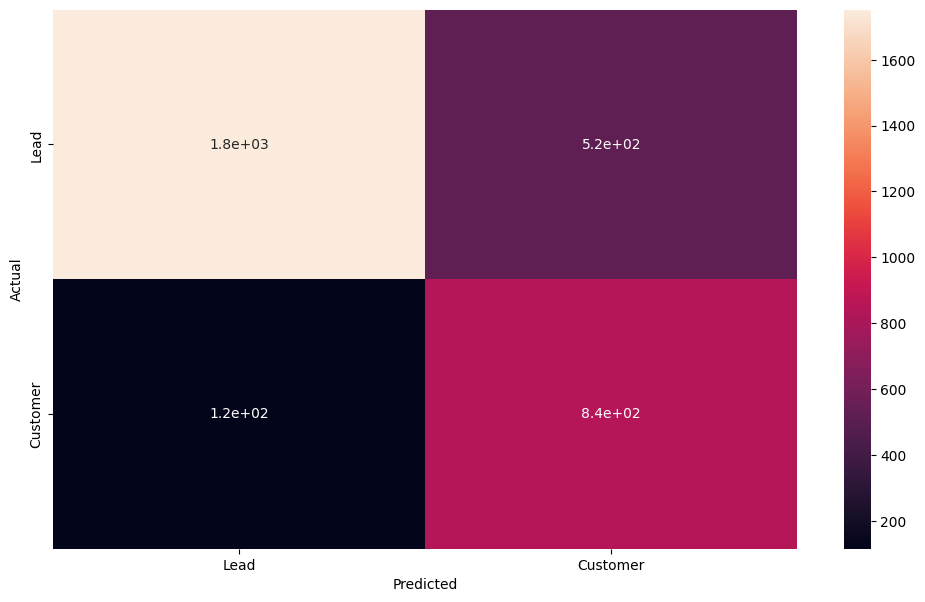

In [126]:
y_trainpred_dt_tune = dtree_tune.predict(x_train) #training tuned Decision Tree model

metrics_score(y_train, y_trainpred_dt_tune)       #Did recall improve for True Customers? Yes

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



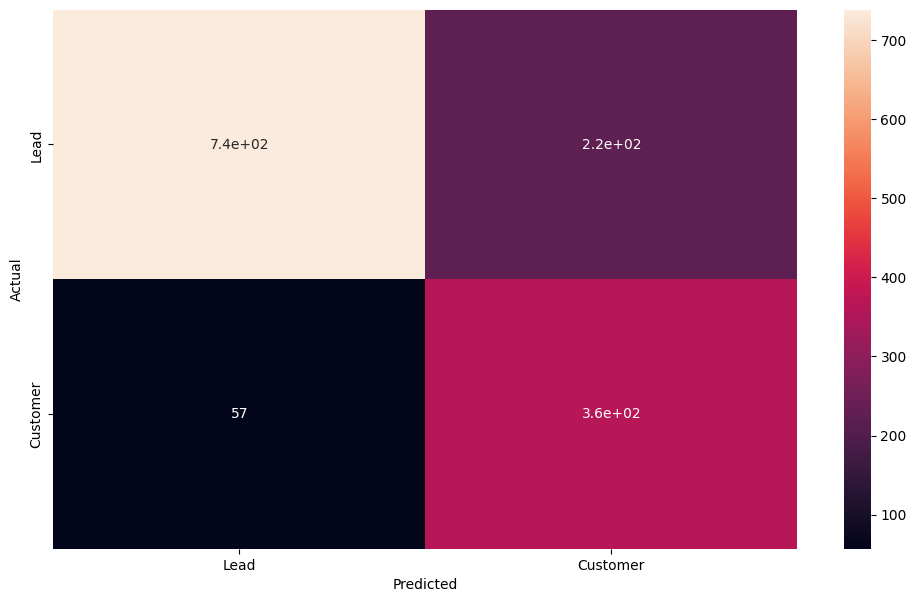

In [127]:
y_testpred_dt_tune = dtree_tune.predict(x_test) #testing tuned Decision Tree model

metrics_score(y_test, y_testpred_dt_tune)       #Did the training outperform the test? Yes

**OBSERVATIONS**

*   Decision Tree model has a high recall score which means that is over classifying leads as customers.
*   Let's fit the data to a different model to see if the false positives are reduced.



## Building a Random Forest model

In [128]:
rfclass = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)
rfclass.fit(x_train, y_train) #Fit the data to the model

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



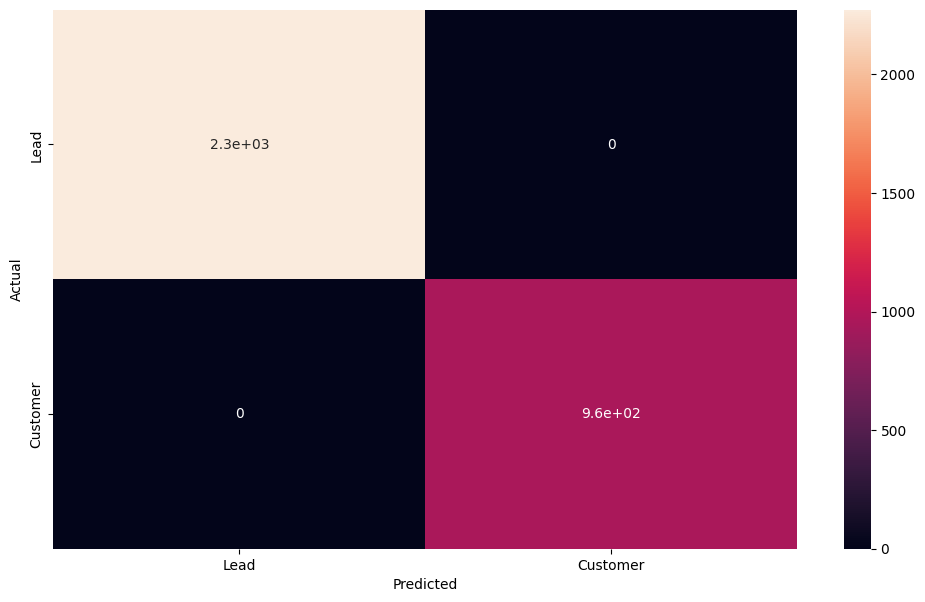

In [129]:
y_trainpred_rf = rfclass.predict(x_train)    #Perfomance of Random Forest model with training data
metrics_score(y_train, y_trainpred_rf)       #Provide confusion matrix in form of heatmap to visualize the performance of the model

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.81      0.68      0.74       422

    accuracy                           0.85      1384
   macro avg       0.84      0.80      0.82      1384
weighted avg       0.85      0.85      0.85      1384



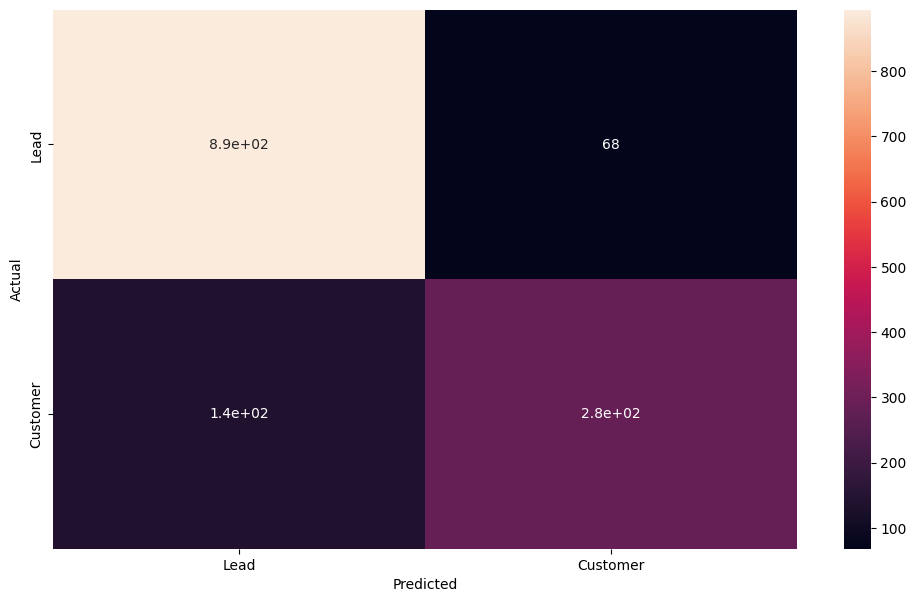

In [130]:
y_testpred_rf = rfclass.predict(x_test)    #Perfomance of Random Forest model with test data
metrics_score(y_test, y_testpred_rf)       #Recall score is preciting true customers at 68%

## Do we need to prune the tree?

*   The Random Forest model does not recall true customers effectively. We cannot trust a model that claims it is 100% accurate.
*   The test data was able to perform better than the training data but the model is still misclassifying.




In [131]:
rf_tune = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_tune, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_tune = grid_obj.best_estimator_

#Fit the tuned model with training data
rf_tune.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=0.7,
                       min_samples_leaf=np.int64(3), random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2273
           1       0.88      0.96      0.92       955

    accuracy                           0.95      3228
   macro avg       0.93      0.95      0.94      3228
weighted avg       0.95      0.95      0.95      3228



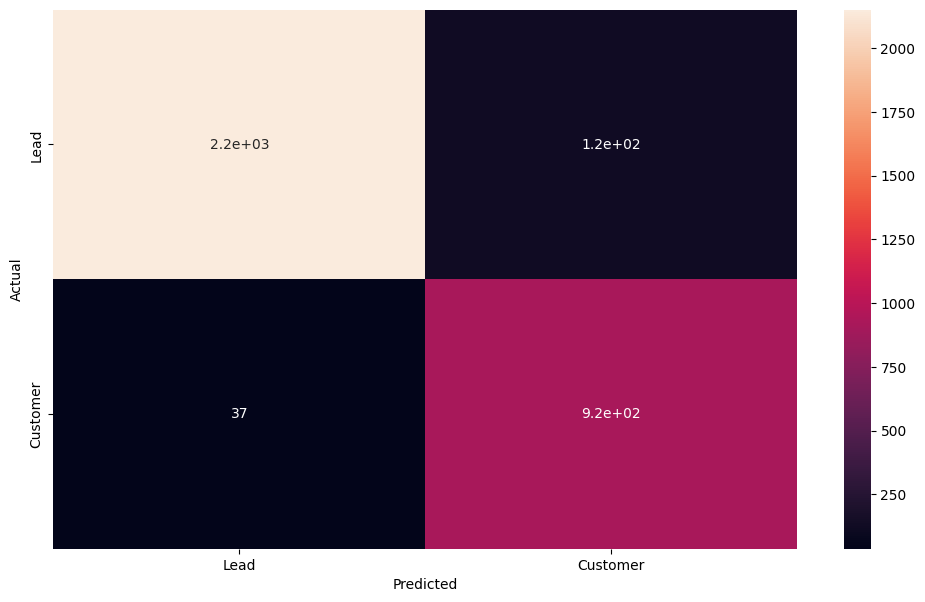

In [132]:
y_trainpred_rf_tune = rf_tune.predict(x_train) #Performance of Tuned Random Forest model with training data
metrics_score(y_train, y_trainpred_rf_tune)    #Tuned Random Forest model performed really well! 96% recall!

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       962
           1       0.78      0.75      0.77       422

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



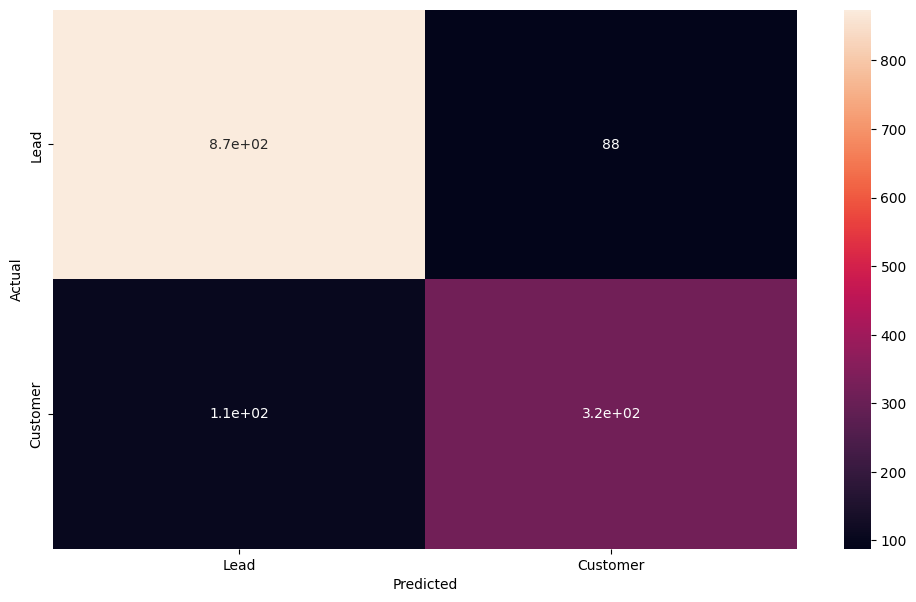

In [133]:
y_testpred_rf_tune = rf_tune.predict(x_test)    #Perfomance of Tuned Random Forest model with test data
metrics_score(y_test, y_testpred_rf_tune)       #Recall score is preciting true customers at 75% accuracy after tuning. Finally outperformed by the training data.

**MODEL OBSERVATIONS**

*   The model that should be used to predict which leads are in fact customers or ones that will become customers is the Tuned Random Forest Model.
*   Tuning this model with class weights that denote class frequencies and then max features which denotes when to split (at which weight) provided the highest recall score for training data.  
*   Model is able to predict that a customer is in fact a customer at 96% accuracy.
*   Random Forest model does take more time and bandwidth but performs the best of the two models.







## Actionable Insights and Recommendations

**CUSTOMER PROFILE**

*   Working professionals or unemployed professionals looking to learn a new skill or utilize the products and services for training and insight.
*   Majority of the converted leads were flipped via referral which means there is a robust/incentivized program to bring customers in from similar workplaces. (Not sure why my EDA said other wise)
*   Time spent on website is more than double that of leads therefore there is legitimate engagement.
*   The first interaction for most of the converted leads was throught the website therefore there is something about the offerings, style and layout of the website that is making people stay logged on. (i.e. training videos, lectures, seminars etc.)







**LEAD PROFILE MOST LIKELY TO CONVERT TO CUSTOMER**

*   Leads that are perceived to be engaged with ExtraaLearn either by web or app but have yet to make the jump.
*   Most likely a student or someone inbetween jobs or looking to change careers and learn new skills.
*   Money will always be a factor. If it is students or unemployed professionals, even with 20%+ non customers receiving referalls, there seems to be a barrier for some to commit. The referall must come with some discount for the products/services provided in order to create more of an incentive. The occupations show that money could be tight.
*  Leads that have high pageviews counts regardless of time spent will be more like to convert than ones with low pageview counts. Customers who are converted and spend time on the website tend to have high pageview counts which means they are utlizing all aspects of the products/offerings therefore, if a lead is already interested in all that ExtraaLearn has to offer, then they are more likely to become a paying customer.



